In [134]:
import tensorflow as tf
import keras
import sys

In [135]:
print(tf.__version__)
print(keras.__version__)
print(sys.version)

2.10.0
2.10.0
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [136]:
import numpy as np
import matplotlib

In [137]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [138]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [139]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


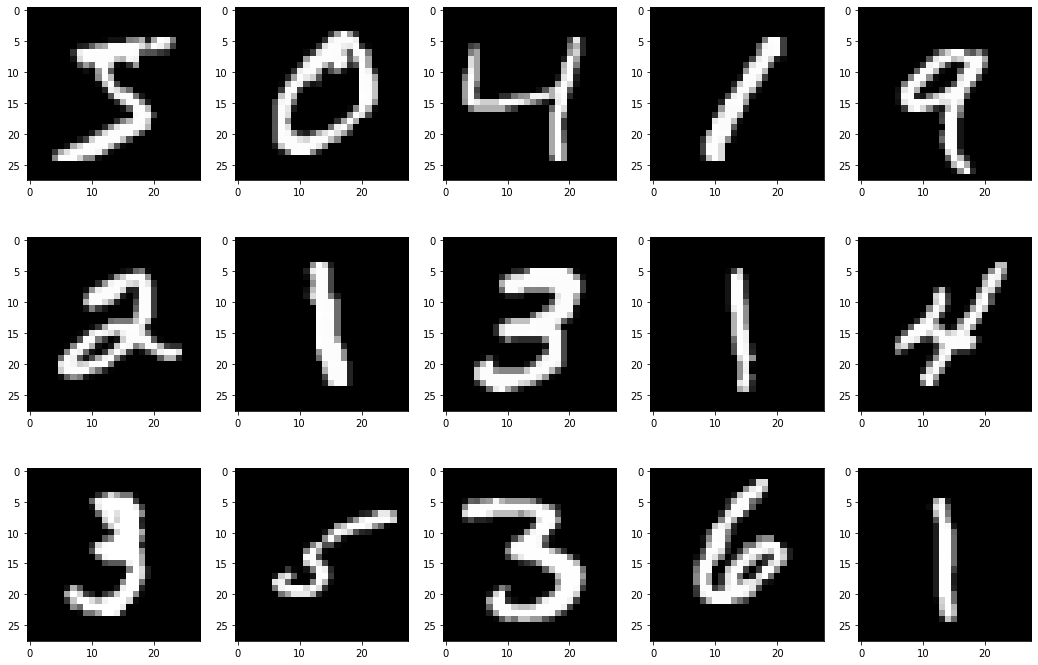

In [140]:
figure, axes = plt.subplots(nrows = 3, ncols = 5 )
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].imshow(X_train[col])
    axes[row][1].imshow(X_train[col+ 1])
    axes[row][2].imshow(X_train[col+ 2])
    axes[row][3].imshow(X_train[col+ 3])
    axes[row][4].imshow(X_train[col+ 4])

In [141]:
X_train = X_train.reshape(60000, 784)
X_test =X_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

##  입력층에 입력되는 값을 정규화 시키기

In [142]:
X_train = X_train/255.0
X_test = X_test/255.0

In [143]:
X_train.min(), X_train.max()

(0.0, 1.0)

### 모델 구축 및 학습, 평가

In [144]:
model = Sequential()
model.add(Dense(units=256, input_dim=28*28, activation ='relu'))
model.add(Dense(units=10, activation = 'softmax' )) ## 다항분류일경우 마지막 활성화 함수는 softmax

In [145]:
model.compile(loss= 'categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [146]:
hist = model.fit(X_train ,y_train,
                 validation_data=(X_test, y_test),
                 epochs=10, 
                 batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6147 - accuracy: 0.8489 - val_loss: 0.3497 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.9086 - val_loss: 0.2882 - val_accuracy: 0.9201
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.9223 - val_loss: 0.2539 - val_accuracy: 0.9291
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9308 - val_loss: 0.2303 - val_accuracy: 0.9369
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2261 - accuracy: 0.9373 - val_loss: 0.2100 - val_accuracy: 0.9411
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2075 - accuracy: 0.9422 - val_loss: 0.1967 - val_accuracy: 0.9451
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1919 - accuracy: 0.9459 - val_loss: 0.1842 - val_accuracy:

In [147]:
print('## training loss and acc ##')
print(hist.history['loss'])        
print(hist.history['accuracy'])

## training loss and acc ##
[0.6147405505180359, 0.32845190167427063, 0.28025999665260315, 0.24934114515781403, 0.22611188888549805, 0.2075451761484146, 0.1918931007385254, 0.1784522980451584, 0.16693338751792908, 0.1568736433982849]
[0.8488500118255615, 0.9086333513259888, 0.9223333597183228, 0.9307666420936584, 0.9372666478157043, 0.9421833157539368, 0.9458500146865845, 0.9495166540145874, 0.9531166553497314, 0.9559666514396667]


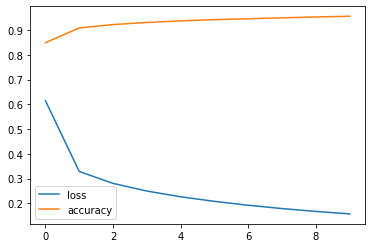

In [148]:
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.legend()